<h1><center><b>Heart Failure Prediction</b></center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy

#Suppressing all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df = pd.read_csv("/content/drive/MyDrive/Nilesh/heart_failure_clinical_records_dataset.csv")

<b>Aim of this notebook</b>

<p>In this notebook, I visualize the distribution of the variables in the Heart Failure Prediction dataset and explore their relationship with the target variable DEATH_EVENT. Based on the result of this analysis, I define seven machine learning models to compare their performance on this dataset to predict the target variable using the most correlated subset of variables from the dataset.</p>



<b>Lets see what our dataset looks like.</b>

In [2]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<b>Data distribution</b>

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<b>Death Event Distribution</b>

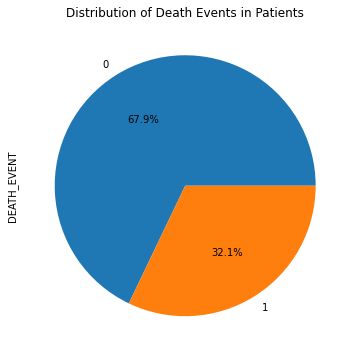

In [4]:
plt.figure(figsize=(10,6))
df["DEATH_EVENT"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("Distribution of Death Events in Patients")
plt.show()

<b>Correlation Heatmap</b>

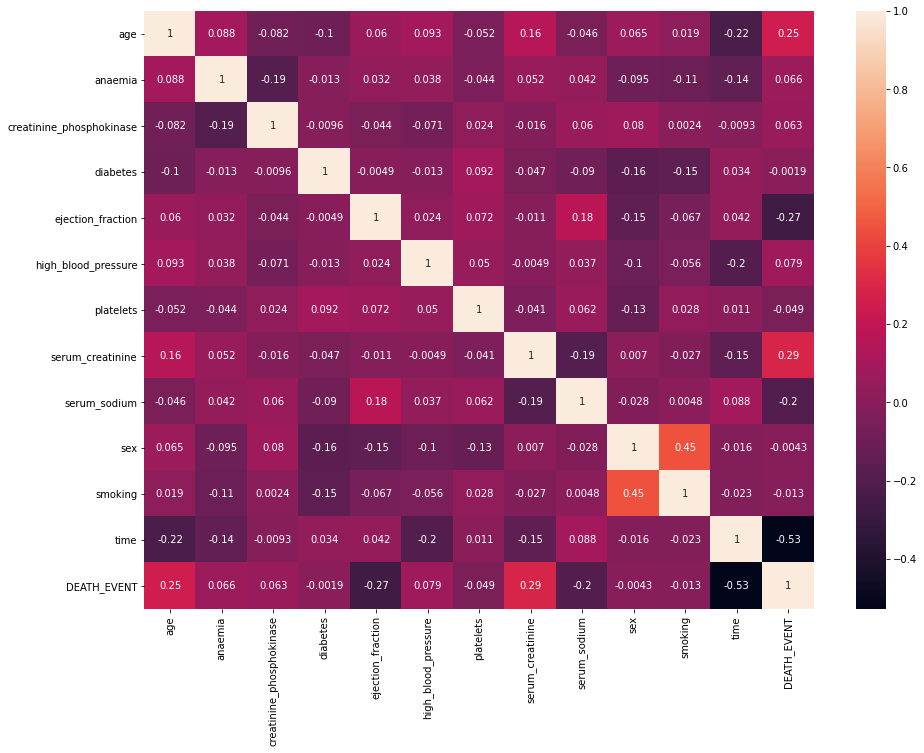

In [5]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,11))
sns.heatmap(corr, annot=True)
plt.show()

In [6]:
corr[abs(corr["DEATH_EVENT"]) > 0.1]["DEATH_EVENT"]

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

The features "age", "ejection_fraction", "serum_creatinine", "serum_sodium", and "time" have a considerable correlation with "DEATH_EVENT"

In [7]:
# Trial and Error revealed that not considering Age column improves accuracy

x = df[["ejection_fraction", "serum_creatinine", "serum_sodium", "time"]]
x = (x-x.mean())/x.std()
y = df["DEATH_EVENT"]

In [8]:
#Spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

<b>Logistic Regression</b>

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        64
           1       0.77      0.65      0.71        26

    accuracy                           0.84        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.84      0.84      0.84        90

Logistic Regression Success Rate : 84.44%


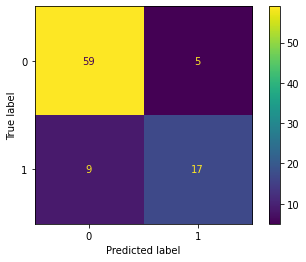

In [10]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
s1=accuracy_score(y_test,y_pred)     # s1 - Score1
print("Logistic Regression Success Rate :", "{:.2f}%".format(100*s1))
plot_confusion_matrix(lr, x_test, y_test)
plt.show()

<b>Gradient Booster Classifier</b>

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.76      0.73      0.75        26

    accuracy                           0.86        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.85      0.86      0.85        90

Gradient Booster Classifier Success Rate : 85.56%


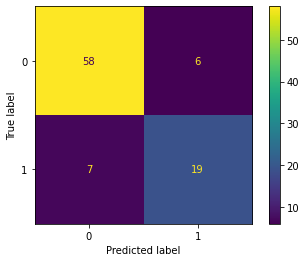

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print(classification_report(y_test,y_pred))
s2=accuracy_score(y_test,y_pred)
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2))
plot_confusion_matrix(gbc, x_test, y_test)
plt.show()

<b>Random Forest Classifier</b>

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        64
           1       0.76      0.73      0.75        26

    accuracy                           0.86        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.85      0.86      0.85        90

Random Forest Classifier Success Rate : 85.56%


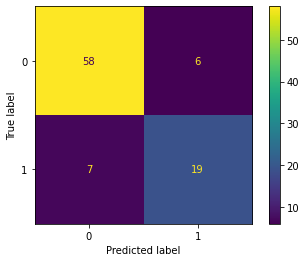

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
s3=accuracy_score(y_test,y_pred)
print("Random Forest Classifier Success Rate :", "{:.2f}%".format(100*s3))
plot_confusion_matrix(rfc, x_test, y_test)
plt.show()

<b>Support Vector Machine</b>

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90

Support Vector Machine Success Rate : 81.11%


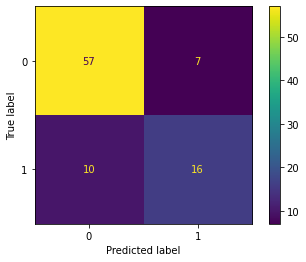

In [13]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
print(classification_report(y_test,y_pred))
s4=accuracy_score(y_test,y_pred)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))
plot_confusion_matrix(svm, x_test, y_test)
plt.show()

<b>K Nearest Neighbors</b>

K Nearest Neighbors Top 5 Success Rates:
[84.44, 83.33, 83.33, 82.22, 82.22]


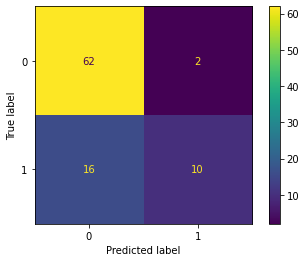

In [19]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    s5=accuracy_score(y_test,y_pred)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])
plot_confusion_matrix(knn, x_test, y_test)
plt.show()

<b>Decision Tree Classifier</b>

Decision Tree Classifier Top 5 Success Rates:
[85.56, 84.44, 84.44, 84.44, 84.44]


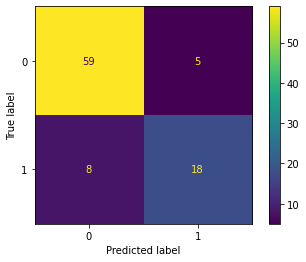

In [15]:
from sklearn.tree import DecisionTreeClassifier
list1 = []
for leaves in range(2,10):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion="entropy")
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred)*100)
print("Decision Tree Classifier Top 5 Success Rates:")
print([round(i, 2) for i in sorted(list1, reverse=True)[:5]])
plot_confusion_matrix(classifier, x_test, y_test)
plt.show()

<b>Gradient Booster Classifier</b>

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

params = {
        "min_child_weight": [1, 5, 10],
        "gamma": [0.5, 1, 1.5, 2, 5],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "max_depth": [3, 4, 5]
        }

xgb = XGBClassifier(n_estimators=200,reg_alpha=1)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=4, 
                    cv=skf.split(x_train,y_train), verbose=0 )

grid.fit(x_train,y_train,early_stopping_rounds=30,eval_set=[(x_test, y_test)])
p2x = grid.best_estimator_.predict(x_test)
s2x=accuracy_score(y_test,p2x)

[0]	validation_0-error:0.166667
Will train until validation_0-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.133333
[2]	validation_0-error:0.133333
[3]	validation_0-error:0.133333
[4]	validation_0-error:0.133333
[5]	validation_0-error:0.155556
[6]	validation_0-error:0.155556
[7]	validation_0-error:0.155556
[8]	validation_0-error:0.133333
[9]	validation_0-error:0.122222
[10]	validation_0-error:0.1
[11]	validation_0-error:0.111111
[12]	validation_0-error:0.111111
[13]	validation_0-error:0.122222
[14]	validation_0-error:0.122222
[15]	validation_0-error:0.111111
[16]	validation_0-error:0.111111
[17]	validation_0-error:0.088889
[18]	validation_0-error:0.1
[19]	validation_0-error:0.088889
[20]	validation_0-error:0.088889
[21]	validation_0-error:0.088889
[22]	validation_0-error:0.088889
[23]	validation_0-error:0.1
[24]	validation_0-error:0.088889
[25]	validation_0-error:0.1
[26]	validation_0-error:0.088889
[27]	validation_0-error:0.1
[28]	validation_0-error:0.088889
[29]	validat

Gradient Booster Classifier Success Rate : 91.11%


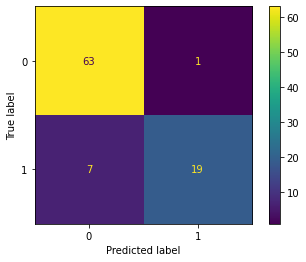

In [17]:
print("Gradient Booster Classifier Success Rate :", "{:.2f}%".format(100*s2x))
plot_confusion_matrix(grid.best_estimator_, x_test, y_test)
plt.show()

<b>Final Results:</b>

In [18]:
print(f"Gradient Booster Classifier: {round(100*s2, 2)}%\nDecision Tree Classifier: {round(sorted(list1, reverse=True)[0], 2)}%\nLogistic Regression: {round(100*s1, 2)}%\nSupport Vector Machine: {round(100*s4, 2)}%\nRandom Forest Classifier: {round(100*s3, 2)}%\nK Nearest Neighbors: {round(sorted(scorelist,reverse=True)[0], 2)}%\nGradient Booster Classifier: {round(100*s2x, 2)}%")

Gradient Booster Classifier: 85.56%
Decision Tree Classifier: 85.56%
Logistic Regression: 84.44%
Support Vector Machine: 81.11%
Random Forest Classifier: 85.56%
K Nearest Neighbors: 84.44%
Gradient Booster Classifier: 91.11%
